In [1]:
#from uatu.watchers import *
from sklearn.model_selection import train_test_split
import h5py

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
f = h5py.File('/home/users/swmclau2/scratch/UatuLightconeTest/UatuLightconeTest.hdf5', 'r')
boxno = 40
test_X = np.array(f['Box%03d'%boxno]["X"].value)
test_Y = f['Box%03d'%boxno]['Y'].value
f.close()

In [4]:
f = h5py.File('/home/users/swmclau2/scratch/UatuLightconeTest/UatuLightconeAttackedBayesTranspose.hdf5', 'r')
boxno = 40
attack_X = np.array(f['Box%03d'%boxno]["X"].value)
attack_Y = f['Box%03d'%boxno]['Y'].value
f.close()

In [5]:
print attack_Y[0,:]
print test_Y[0,:]

[ 0.312329  0.906916]
[ 0.312329  0.906916]


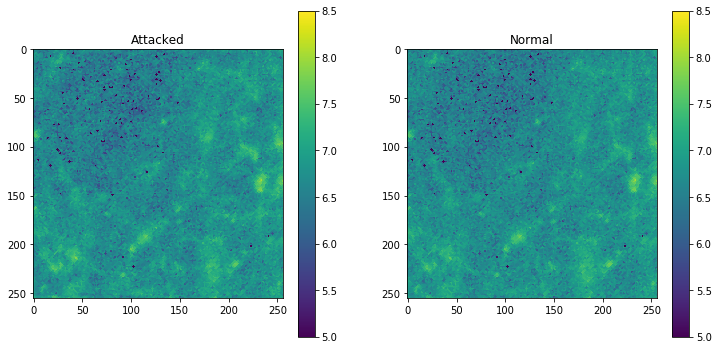

In [6]:
fig = plt.figure(figsize = (19, 6))
#boxno = 0
n = 100
plt.subplot(131)
im = plt.imshow(attack_X[n, :, :, 0], vmin = 5, vmax = 8.5)
plt.colorbar(im)
#plt.title(r"$\Omega_m$: %0.3f    $\sigma_8$: %0.3f"%(attack_Y[0,0], attack_Y[0,1]))
plt.title('Attacked')
plt.subplot(132)

im = plt.imshow(test_X[n, :, :, 0], vmin = 5, vmax = 8.5)
plt.colorbar(im)
plt.title('Normal')
#plt.title(r"$\Omega_m$: %0.3f    $\sigma_8$: %0.3f"%(test_Y[0][0], test_Y[0][1]))
#plt.subplot(133)

#im = plt.imshow(attack_X[0, :, :, 0]- test_X[0, :, :, 0], vmin = -1, vmax = 8.5)
#plt.colorbar(im)
#plt.title('Diff')

plt.show()

In [7]:
from scipy.fftpack import fft2

From https://www.astrobetter.com/blog/2010/03/03/fourier-transforms-of-images-in-python/

In [8]:
def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof



In [9]:
from scipy import fftpack
import numpy as np
import pylab as py
#import radialProfile

def image_ps(image):
  
    # Take the fourier transform of the image.
    F1 = fftpack.fft2(image)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 )

    # Calculate a 2D power spectrum
    psd2D = np.abs( F2 )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = azimuthalAverage(psd2D)

    return psd1D

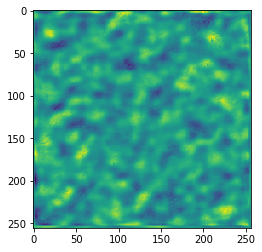

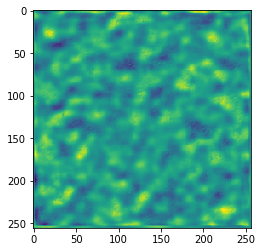

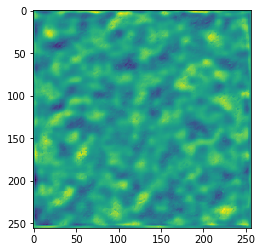

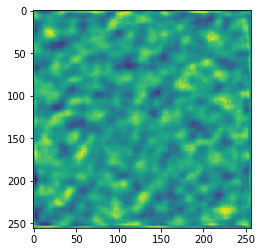

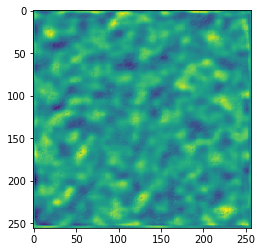

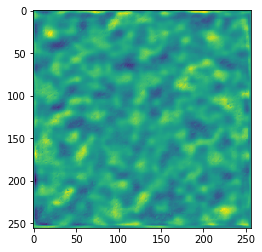

In [10]:
for i in xrange(attack_X.shape[0]):
    plt.imshow(attack_X[i, :, :, 0] - test_X[i,:,:,0])
    plt.show()
    if i>=5:
        break

In [11]:
attacked_ps = np.zeros((attack_X.shape[0], 179))
normal_ps = np.zeros((attack_X.shape[0], 179))
diff_ps = np.zeros((attack_X.shape[0], 179))

for i in xrange(attack_X.shape[0]):
    attacked_ps[i] = image_ps(attack_X[i, :, :, 0])
    normal_ps[i] = image_ps(test_X[i, :, :, 0])
    diff_ps[i] = image_ps(attack_X[i, :, :, 0] - test_X[i, :, :, 0])

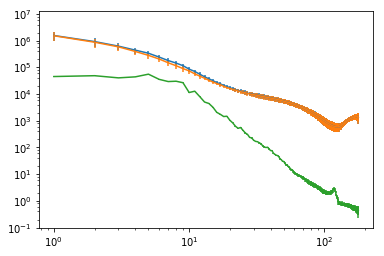

In [12]:
#plt.plot(attacked_ps.T, alpha = 0.1, color = 'k')
plt.errorbar(range(179), attacked_ps.mean(axis = 0), yerr=attacked_ps.std(axis=0) )
plt.errorbar(range(179), normal_ps.mean(axis = 0), yerr = normal_ps.std(axis=0))
plt.errorbar(range(179), diff_ps.mean(axis = 0), yerr = diff_ps.std(axis=0))

plt.loglog();